data cleaning


In [ ]:
import pandas as pd
import numpy as np

df_raw = pd.read_csv("data/dataset.csv", encoding="utf-8")

print("Raw shape:", df_raw.shape)
df_raw.head()
#ahibhruth


Raw shape: (40, 22)


,event_id,industry,country,initiating_company,responding_company,event_date,source_name,source_url,action_type,action_description,...,quantity_before,quantity_after,response_observed,response_type,response_lag_days,market_share_change_estimated,public_sentiment_shift,market_structure,regulatory_sensitivity,notes
0,EJP_ELEC_001,Electronics Retail,Japan,BIC Camera,Yodobashi Camera,15-10-2018,Nikkei Asia,https://asia.nikkei.com/Business/Retail/Bic-Ca...,Loyalty incentive,BIC increased point-back rates during autumn s...,...,Standard,Standard,Yes,Matched points campaign,7.0,Neutral,Positive,Oligopoly,No,Loyalty-based competitive escalation.
1,EJP_ELEC_002,Electronics Retail,Japan,BIC Camera,Yodobashi Camera,01-04-2019,Asahi Shimbun,https://www.asahi.com/articles/consumption-tax...,Price adjustment,Adjusted prices following Japan consumption ta...,...,Standard,Standard,Yes,Parallel price adjustment,14.0,Neutral,Neutral,Oligopoly,Yes,Tax-driven industry-wide adjustment.
2,EJP_ELEC_003,Electronics Retail,Japan,BIC Camera,Yodobashi Camera,01-12-2019,Japan Times,https://www.japantimes.co.jp/business/bic-wint...,Price promotion,BIC launched winter discount sale across TVs/a...,...,Standard,Standard,Yes,Short-term discounting,10.0,Neutral,Positive,Oligopoly,No,Seasonal price rivalry.
3,EJP_ELEC_004,Electronics Retail,Japan,BIC Camera,Yodobashi Camera,12-05-2020,Mainichi,https://mainichi.jp/articles/bic-online-covid,Channel expansion,Expanded online discounts/delivery during COVI...,...,Standard,Home Delivery,No,Yodobashi retained logistics lead,NaN,Neutral,Positive,Oligopoly,No,Pandemic-led digital push.
4,EJP_ELEC_005,Electronics Retail,Japan,BIC Camera,Yodobashi Camera,18-11-2020,Nikkei Asia,https://asia.nikkei.com/Bic-Black-Friday,Price promotion,BIC increased promotional discounts for Black ...,...,Standard,Standard,Yes,Promotional price matching,8.0,Neutral,Positive,Oligopoly,No,Imported sales-event competition.


In [3]:
df = df_raw.copy()


In [4]:
missing_values = ["NA", "N/A", "", "None", "null"]
df.replace(missing_values, np.nan, inplace=True)

df.isna().sum()


event_id                          0
industry                          0
country                           0
initiating_company                0
responding_company                0
event_date                        0
source_name                       0
source_url                        0
action_type                       0
action_description                0
price_before                      6
price_after                       3
quantity_before                   3
quantity_after                    0
response_observed                 0
response_type                     0
response_lag_days                11
market_share_change_estimated     0
public_sentiment_shift            0
market_structure                  0
regulatory_sensitivity            0
notes                             0
dtype: int64

In [5]:
df["event_date"] = pd.to_datetime(
    df["event_date"],
    dayfirst=True,
    errors="coerce"
)


In [6]:
def yes_no_clean(x):
    if pd.isna(x):
        return np.nan
    x = str(x).strip().lower()
    if x == "yes":
        return 1
    if x == "no":
        return 0
    return np.nan

df["response_observed_bin"] = df["response_observed"].apply(yes_no_clean)
df["regulatory_sensitivity_bin"] = df["regulatory_sensitivity"].apply(yes_no_clean)

df[["response_observed", "response_observed_bin"]].head()


,response_observed,response_observed_bin
0,Yes,1
1,Yes,1
2,Yes,1
3,No,0
4,Yes,1


In [7]:
df["response_lag_days_num"] = pd.to_numeric(
    df["response_lag_days"],
    errors="coerce"
)


In [8]:
def price_type(x):
    if pd.isna(x):
        return "missing"
    x = str(x).lower()
    x = x.replace("â¥", "¥")  # encoding fix
    if "¥" in x:
        return "numeric"
    return x

df["price_before_type"] = df["price_before"].apply(price_type)
df["price_after_type"] = df["price_after"].apply(price_type)


In [9]:
df["quantity_after"] = df["quantity_after"].astype(str).str.lower().str.strip()

quantity_map = {
    "standard": 1,
    "bundle": 2,
    "seasonal": 3,
    "expanded": 4,
    "high speed": 4,
    "premium": 4
}

df["quantity_after_code"] = df["quantity_after"].map(quantity_map)


In [10]:
df["crisis_event"] = (
    df["notes"]
    .astype(str)
    .str.lower()
    .str.contains("covid|inflation|lockdown|tax")
)


In [11]:
text_cols = [
    "industry",
    "action_type",
    "response_type",
    "market_structure",
    "public_sentiment_shift"
]

for col in text_cols:
    df[col] = df[col].astype(str).str.lower().str.strip()


In [12]:
df.info()

df["response_type"].value_counts()
df["response_observed_bin"].value_counts(dropna=False)
df["response_lag_days_num"].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   event_id                       40 non-null     object        
 1   industry                       40 non-null     object        
 2   country                        40 non-null     object        
 3   initiating_company             40 non-null     object        
 4   responding_company             40 non-null     object        
 5   event_date                     40 non-null     datetime64[ns]
 6   source_name                    40 non-null     object        
 7   source_url                     40 non-null     object        
 8   action_type                    40 non-null     object        
 9   action_description             40 non-null     object        
 10  price_before                   34 non-null     object        
 11  price_after          

count    29.000000
mean     12.275862
std       6.755403
min       0.000000
25%       7.000000
50%      10.000000
75%      15.000000
max      30.000000
Name: response_lag_days_num, dtype: float64

In [13]:
df.to_csv("data/cleaned_dataset.csv", index=False)
print("✅ Cleaned dataset saved to data/cleaned_dataset.csv")


✅ Cleaned dataset saved to data/cleaned_dataset.csv


In [14]:
df["response_type"].value_counts()
df["response_observed_bin"].value_counts(dropna=False)
df["price_before_type"].value_counts()


price_before_type
neutral       14
numeric       11
missing        6
standard       4
10% points     3
premium        2
Name: count, dtype: int64

EDA

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/cleaned_dataset.csv")


In [16]:
df.shape


(40, 29)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   event_id                       40 non-null     object 
 1   industry                       40 non-null     object 
 2   country                        40 non-null     object 
 3   initiating_company             40 non-null     object 
 4   responding_company             40 non-null     object 
 5   event_date                     40 non-null     object 
 6   source_name                    40 non-null     object 
 7   source_url                     40 non-null     object 
 8   action_type                    40 non-null     object 
 9   action_description             40 non-null     object 
 10  price_before                   34 non-null     object 
 11  price_after                    37 non-null     object 
 12  quantity_before                37 non-null     objec

In [18]:
df["response_type"].value_counts()


response_type
matched points campaign              2
promotional price matching           2
price match                          2
discount response                    2
service response                     2
digital coupon match                 2
parallel price adjustment            1
yodobashi focused on domestic        1
yodobashi retained logistics lead    1
short-term discounting               1
price matching                       1
service upgrade                      1
promotional match                    1
brand perception improved            1
competitive price pressure           1
minimal immediate reaction           1
digital coupon rollout               1
promotional response                 1
price response                       1
digital promotion response           1
service advantage strengthened       1
parallel price move                  1
value perception improved            1
matching takeout offers              1
delayed price hike                   1
increased f

In [19]:
pd.crosstab(
    df["action_type"],
    df["response_type"],
    normalize="index"
)


response_type,brand differentiation,brand perception improved,competitive price pressure,delayed price hike,delayed price response,digital coupon match,digital coupon rollout,digital promotion response,discount response,increased footfall,...,promotional response,sales uplift,service advantage strengthened,service response,service upgrade,short-term discounting,takeout match,value perception improved,yodobashi focused on domestic,yodobashi retained logistics lead
action_type,,,,,,,,,,,,,,,,,,,,,
channel expansion,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0
covid response,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.0,0.000000,0.0
digital promotion,0.0,0.0,0.0,0.00,0.00,0.5,0.25,0.25,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
logistics investment,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
loyalty incentive,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0
menu expansion,0.5,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.000000,0.0
menu promotion,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.000000,0.2,...,0.0,0.2,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
new year promotion,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
price adjustment,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


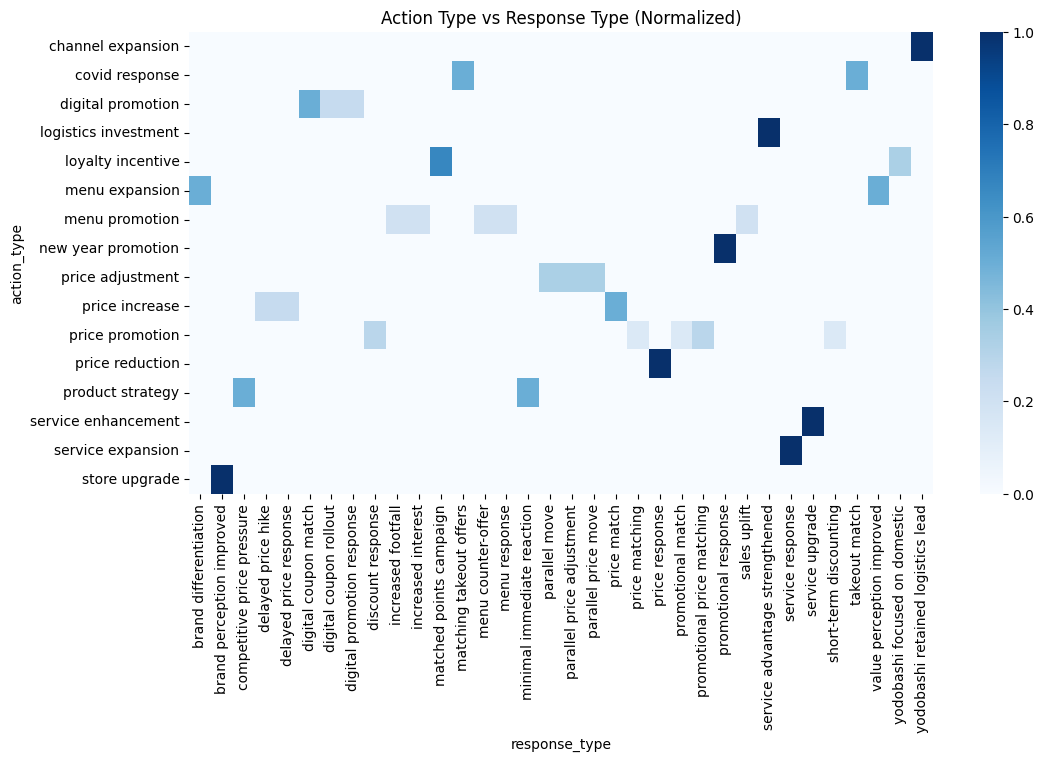

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(
    pd.crosstab(df["action_type"], df["response_type"], normalize="index"),
    cmap="Blues",
    annot=False
)
plt.title("Action Type vs Response Type (Normalized)")
plt.show()


In [21]:
pd.crosstab(df["crisis_event"], df["response_type"], normalize="index")


response_type,brand differentiation,brand perception improved,competitive price pressure,delayed price hike,delayed price response,digital coupon match,digital coupon rollout,digital promotion response,discount response,increased footfall,...,promotional response,sales uplift,service advantage strengthened,service response,service upgrade,short-term discounting,takeout match,value perception improved,yodobashi focused on domestic,yodobashi retained logistics lead
crisis_event,,,,,,,,,,,,,,,,,,,,,
False,0.027778,0.027778,0.027778,0.00,0.027778,0.055556,0.027778,0.027778,0.055556,0.027778,...,0.027778,0.027778,0.027778,0.055556,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778
True,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [22]:
df["response_lag_days_num"].describe()


count    29.000000
mean     12.275862
std       6.755403
min       0.000000
25%       7.000000
50%      10.000000
75%      15.000000
max      30.000000
Name: response_lag_days_num, dtype: float64

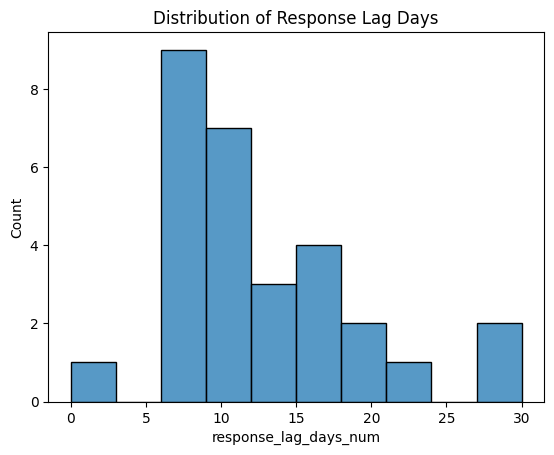

In [23]:
sns.histplot(df["response_lag_days_num"], bins=10)
plt.title("Distribution of Response Lag Days")
plt.show()


In [24]:
df["industry"].value_counts()


industry
electronics retail    20
food service          20
Name: count, dtype: int64

In [25]:
pd.crosstab(df["industry"], df["response_type"], normalize="index")


response_type,brand differentiation,brand perception improved,competitive price pressure,delayed price hike,delayed price response,digital coupon match,digital coupon rollout,digital promotion response,discount response,increased footfall,...,promotional response,sales uplift,service advantage strengthened,service response,service upgrade,short-term discounting,takeout match,value perception improved,yodobashi focused on domestic,yodobashi retained logistics lead
industry,,,,,,,,,,,,,,,,,,,,,
electronics retail,0.00,0.05,0.05,0.00,0.00,0.0,0.05,0.05,0.1,0.00,...,0.05,0.00,0.05,0.0,0.05,0.05,0.00,0.00,0.05,0.05
food service,0.05,0.00,0.00,0.05,0.05,0.1,0.00,0.00,0.0,0.05,...,0.00,0.05,0.00,0.1,0.00,0.00,0.05,0.05,0.00,0.00


ML

In [26]:
counts = df["response_type"].value_counts()
valid_types = counts[counts >= 2].index

df_ml = df[df["response_type"].isin(valid_types)].copy()

df_ml["response_type"].value_counts()


response_type
matched points campaign       2
promotional price matching    2
discount response             2
service response              2
digital coupon match          2
price match                   2
Name: count, dtype: int64

In [27]:
features = [
    "industry",
    "action_type",
    "price_before_type",
    "price_after_type",
    "quantity_after_code",
    "market_structure",
    "regulatory_sensitivity_bin",
    "crisis_event"
]

X = df_ml[features]
y = df_ml["response_type"]


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)


In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


In [30]:
categorical = [
    "industry",
    "action_type",
    "price_before_type",
    "price_after_type",
    "market_structure"
]

numeric = [
    "quantity_after_code",
    "regulatory_sensitivity_bin",
    "crisis_event"
]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", "passthrough", numeric)
    ]
)


In [31]:
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("clf", RandomForestClassifier(
            n_estimators=300,
            random_state=42,
            class_weight="balanced"
        ))
    ]
)


In [32]:
model.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers cont

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


                         precision    recall  f1-score   support

   digital coupon match       1.00      1.00      1.00         1
matched points campaign       1.00      1.00      1.00         1
       service response       1.00      1.00      1.00         1

               accuracy                           1.00         3
              macro avg       1.00      1.00      1.00         3
           weighted avg       1.00      1.00      1.00         3

[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [34]:
feature_names = model.named_steps["preprocessor"].get_feature_names_out()
importances = model.named_steps["clf"].feature_importances_

importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

importance_df.head(10)


,feature,importance
15,cat__price_after_type_neutral,0.082095
7,cat__price_before_type_10% points,0.072491
1,cat__industry_food service,0.062149
11,cat__price_before_type_standard,0.060012
5,cat__action_type_price promotion,0.059914
3,cat__action_type_loyalty incentive,0.059694
9,cat__price_before_type_neutral,0.058378
2,cat__action_type_digital promotion,0.055121
4,cat__action_type_price increase,0.054733
0,cat__industry_electronics retail,0.052365
